## CreditCard Fraud Detection Using NeuralNet

##### [Authors] :  Shveta Sharma, Varshita Kyal, Ujjwal Upadhayay

###  1. Introduction
#### This notebook is an example of a classification model training and testing on inbalanced data.

The dataset(https://www.kaggle.com/mlg-ulb/creditcardfraud) used for analysis contains information about credit card transactions carried out by European cardholders during a period of two days in September 2013. The dataset consists of 284,807 transactions in total, out of which only 492 were fraudulent.

This dataset is highly imbalanced, with the positive class (frauds) accounting for only 0.172% of all transactions. In other words, the majority of transactions are legitimate, and the number of fraudulent transactions is very small in comparison. This presents a challenge for building a predictive model since the algorithm will be biased towards the majority class, and it may not be able to detect the minority class (frauds) accurately.

Therefore, special care must be taken when analyzing this dataset to ensure that the predictive model does not falsely label legitimate transactions as fraudulent. Techniques such as oversampling, undersampling, and SMOTE can be used to balance the dataset, and improve the accuracy of the model.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### 2. Load and prepare dataset

#### Simple pre-processing:

Added columns for wday, day(of month), hour(of day) and sec(of hour)
Added columns with vr broken in value slices
Added column with the standardized value
Bellow an sample of the data and some column statistics:

In [6]:
cc_data=pd.read_csv("creditcard.csv")
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
cc_data.shape

(282953, 31)

In [7]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#dropping time column as it is irrelevant

cc_data.drop(['Time'], axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
#dropping duplicates
cc_data.duplicated().sum()

cc_data.drop_duplicates(keep=False,inplace=True)

There are no missing values present in the credit card data set. Although there were some duplicate values which were removed.

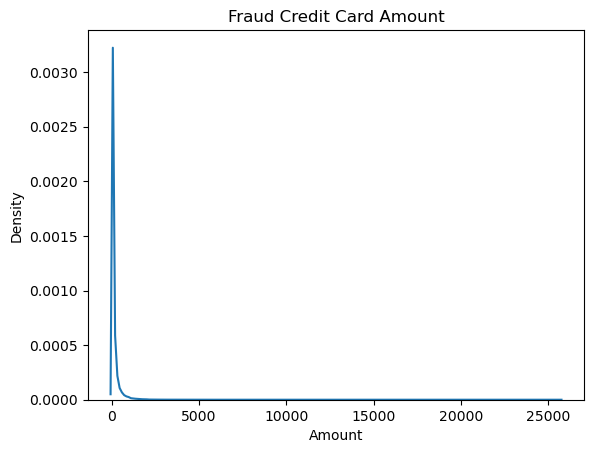

In [16]:
sns.kdeplot(x='Amount', data=cc_data)
plt.title('Fraud Credit Card Amount')
plt.show()

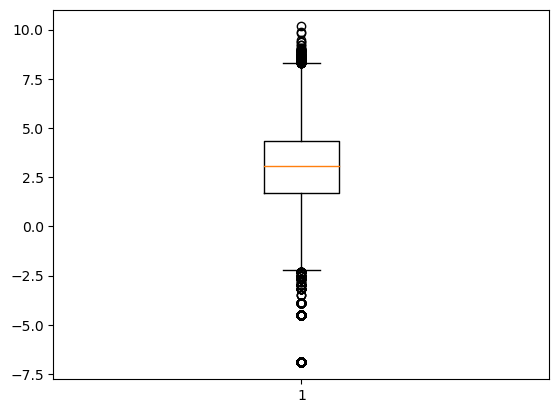

In [27]:
# Apply a box transformation to the amount column using the numpy log function
cc_data['amount_box'] = np.log(df['Amount'] + 0.001)

# Visualize the box-transformed amount column using a boxplot
plt.boxplot(cc_data['amount_box'])
plt.show()

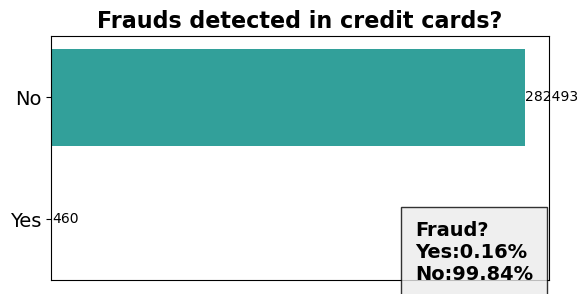

In [34]:
class_1 = len(cc_data[cc_data['Class']==1])/len(cc_data)
class_0 = len(cc_data[cc_data['Class']==0])/len(cc_data)

labels=['No','Yes']
colors=['#20B2AA', '#FFC300']

plt.figure(figsize=(6,3))
ax = sns.countplot(y='Class', data=cc_data, palette=colors)
ax.bar_label(ax.containers[0])
plt.title('Frauds detected in credit cards?', fontsize=16, fontweight='bold')
plt.xticks([])
plt.figtext(.7, .05, "Fraud?\nYes:{:.2f}%\nNo:{:.2f}%".format(class_1*100,class_0*100), 
            bbox ={'facecolor':'#ECECEC', 'alpha':0.8, 'pad':10}, fontsize=14, fontweight='bold')
plt.yticks(cc_data['Class'].value_counts().index, labels, fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

Clearly the data is imbalanced, so we have to handle it first. We can try SMOTE library with resampling.

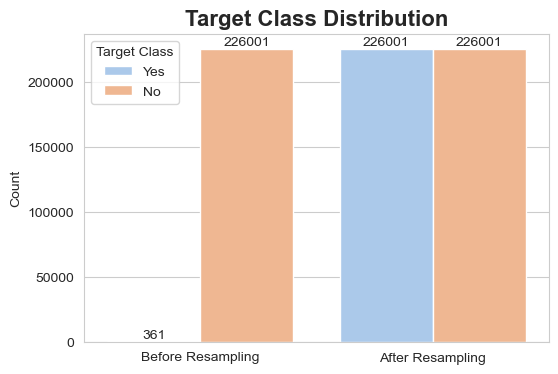

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cc_data.drop('Class', axis=1), cc_data['Class'], test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Create a DataFrame with the target class counts before and after resampling
class_counts = pd.DataFrame({
    'Class': ['Before Resampling', 'After Resampling'],
    'Yes': [len(y_train[y_train==1]), len(y_train_res[y_train_res==1])],
    'No': [len(y_train[y_train==0]), len(y_train_res[y_train_res==0])]
})

# Reshape the DataFrame to have a "Class" column and a "Value" column
class_counts_melted = class_counts.melt(id_vars=['Class'], var_name='Target Class', value_name='Count')

# Plot a countplot of the target class before and after resampling
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.set_palette('pastel')
ax = sns.barplot(x='Class', y='Count', hue='Target Class', data=class_counts_melted)
plt.title('Target Class Distribution', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')

# Add text labels for the counts on the bars
for i, bar in enumerate(ax.containers):
    for rect in bar:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height, f"{int(height)}", ha='center', va='bottom')

plt.show()


In [42]:
# Train a logistic regression model on the oversampled training set
lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)

# Evaluate the model on the testing set
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56492
           1       0.06      0.88      0.11        99

    accuracy                           0.97     56591
   macro avg       0.53      0.93      0.55     56591
weighted avg       1.00      0.97      0.99     56591



### Neural Network:

To apply a neural network (NN) to the preprocessed data, you can use a deep learning library such as TensorFlow or Keras. 

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


This code defines a sequential model with three dense layers. The first two layers have a ReLU activation function, and the last layer has a sigmoid activation function. The input shape of the first layer should match the number of features in the preprocessed data.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


This code compiles the model using the Adam optimizer, binary cross-entropy loss, and accuracy metric.

In [ ]:
history = model.fit(X_train_pca, y_train, 
                    epochs=50, batch_size=32, 
                    validation_data=(X_test_pca, y_test))


This code trains the model on the preprocessed training data for 100 epochs, with a batch size of 32. It also uses the preprocessed test data for validation during training.

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print('Test accuracy:', test_acc)

This code evaluates the trained model on the preprocessed test data and prints the test accuracy.